In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('Data/Nadia_Murad.jpg',0)
denis = cv2.imread('Data/Denis_Mukwege.jpg',0)
conference = cv2.imread('Data/solvay_conference.jpg',0)

In [3]:
face_cascade=cv2.CascadeClassifier('Data/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img= img.copy()
    face_rectrs=face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rectrs:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

In [6]:
result = detect_face(nadia)

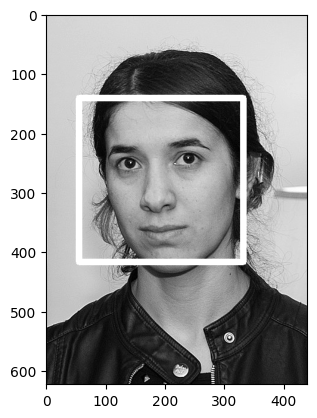

In [9]:
plt.imshow(result,cmap='gray')

In [10]:
result = detect_face(conference)

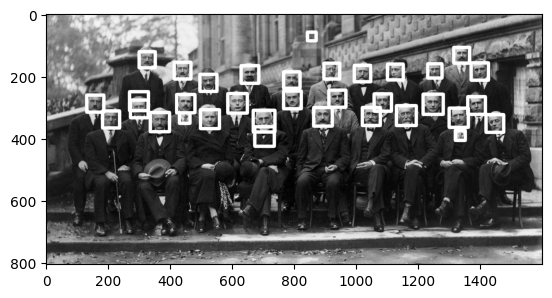

In [11]:
plt.imshow(result,cmap='gray')

In [13]:
result = adj_detect_face(conference)

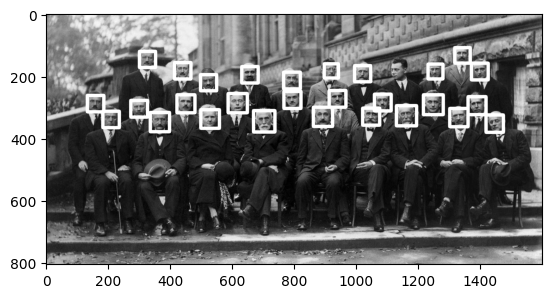

In [14]:
plt.imshow(result,cmap='gray')

In [17]:
eye_cascade=cv2.CascadeClassifier('Data/haarcascades/haarcascade_eye.xml')

In [18]:
def detect_eyes(img):
    face_img= img.copy()
    face_rectrs=eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in face_rectrs:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

In [21]:
result = detect_eyes(nadia)

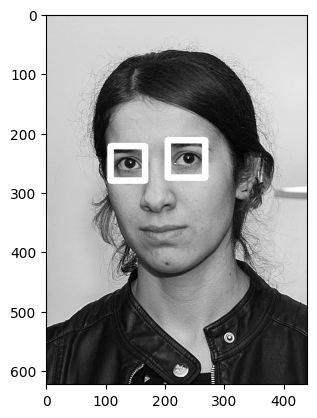

In [22]:
plt.imshow(result,cmap='gray')

In [39]:
face_cascade2=cv2.CascadeClassifier('Data/haarcascades/haarcascade_frontalface_alt2.xml')

In [42]:
def adj_detect_face(img):
    face_img= img.copy()
    face_rectrs=face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    if len(face_rectrs) == 0:
        face_rectrs=face_cascade2.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in face_rectrs:
        
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),10)

    return face_img

In [43]:
cap =cv2.VideoCapture(0)

while True:

    ret,frame=cap.read(0)
    frame = adj_detect_face(frame)
    cv2.imshow('Video Face Detect', frame)
    k = cv2.waitKey(1)
    if k ==27:
        break

cap.release()
cv2.destroyAllWindows()